<a href="https://colab.research.google.com/github/PCeltide/Python-for-Algorithmic-Trading-Cookbook/blob/main/Chapter%205/1_Identifying_Latent_Return_Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openbb[all]

In [2]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"

Extensions to add: alpha_vantage@1.4.1, biztoc@1.4.2, cboe@1.4.1, deribit@1.0.1, ecb@1.4.2, econometrics@1.5.3, federal_reserve@1.4.3, finra@1.4.1, finviz@1.3.1, government_us@1.4.1, multpl@1.1.1, nasdaq@1.4.1, openbb_charting@2.3.4, quantitative@1.4.3, seeking_alpha@1.4.1, stockgrid@1.4.1, technical@1.4.3, tmx@1.3.2, tradier@1.3.1, wsj@1.4.1, yfinance@1.4.6
Extensions to remove: federal_reserve@1.4.2, yfinance@1.4.3

Building...


In [9]:
obb.user.credentials.fmp_api_key = "YOUR_API_KEY"

In [10]:
stocks = ['AAPL', 'AMZN', 'GOOG', 'JNJ', 'JPM', 'MSFT', 'NVDA', 'PG', 'TSLA', 'V']

In [11]:
all_ratios_list = [] # Initialize an empty list to store individual DataFrames

print(f"Fetching fundamental ratios for {len(stocks)} stocks one by one...\n")

for ticker in stocks:
    try:
        print(f"Fetching ratios for: {ticker}")
        # Fetch data for the current ticker
        # The result from this call for a single symbol should be a DataFrame
        # with the ticker as its index.
        ticker_ratios_df = obb.equity.fundamental.ratios(symbol=ticker, provider="fmp")

        if not ticker_ratios_df.empty:
            all_ratios_list.append(ticker_ratios_df)
            print(f"Successfully fetched and added data for {ticker}")
        else:
            print(f"No data returned for {ticker}")

    except Exception as e:
        print(f"Could not fetch data for {ticker}. Error: {e}")
    print("-" * 30) # Separator

Fetching fundamental ratios for 10 stocks one by one...

Fetching ratios for: AAPL
Successfully fetched and added data for AAPL
------------------------------
Fetching ratios for: AMZN
Successfully fetched and added data for AMZN
------------------------------
Fetching ratios for: GOOG
Successfully fetched and added data for GOOG
------------------------------
Fetching ratios for: JNJ
Successfully fetched and added data for JNJ
------------------------------
Fetching ratios for: JPM
Successfully fetched and added data for JPM
------------------------------
Fetching ratios for: MSFT
Successfully fetched and added data for MSFT
------------------------------
Fetching ratios for: NVDA
Successfully fetched and added data for NVDA
------------------------------
Fetching ratios for: PG
Successfully fetched and added data for PG
------------------------------
Fetching ratios for: TSLA
Successfully fetched and added data for TSLA
------------------------------
Fetching ratios for: V
Successful

In [12]:
import pandas as pd

In [47]:
if all_ratios_list:
    # Use the 'keys' argument to add the stock symbols as the outer level of the index
    # Also, 'names' will label the levels of our new MultiIndex
    fundamental_df = pd.concat(all_ratios_list, keys=stocks, names=['symbol', 'original_period_index'])

    print("\nSuccessfully concatenated all stock data with a MultiIndex.")
    print("\nFinal DataFrame Info:")
    fundamental_df.info()
    print("\nExample: Accessing data for a specific stock (e.g., AAPL):")
    if 'AAPL' in fundamental_df.index.get_level_values('symbol'):
        print(fundamental_df.loc['AAPL'])
    else:
        print("AAPL not found in index, please check your stock list and fetched data.")

else:
    print("\nNo data was fetched for any stock.")
    fundamental_df = pd.DataFrame()


Successfully concatenated all stock data with a MultiIndex.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('AAPL', 0) to ('V', 4)
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   period_ending                             50 non-null     object 
 1   fiscal_period                             50 non-null     object 
 2   fiscal_year                               50 non-null     int64  
 3   current_ratio                             50 non-null     float64
 4   quick_ratio                               50 non-null     float64
 5   cash_ratio                                50 non-null     float64
 6   days_of_sales_outstanding                 50 non-null     float64
 7   days_of_inventory_outstanding             38 non-null     float64
 8   operating_cycle                           50 non-null     float64
 9   days_of_pay

We want to create a custom factor

$$\frac{\textrm{Net Income}}{\textrm{Market Cap}}+\frac{\textrm{Total Revenue}}{\textrm{Total Assets}}.$$

Note the first term is the *earnings yield*, which is the **inverse** of the PE-ratio; the second term is the Asset Turnover.

In [14]:
idx = fundamental_df.groupby('symbol')['fiscal_year'].idxmax()
latest_fundamental_df = fundamental_df.loc[idx]
latest_fundamental_df.head(10)

,,period_ending,fiscal_period,fiscal_year,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,...,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,interest_coverage
symbol,original_period_index,,,,,,,,,,,,,,,,,,,,,
AAPL,0,2024-09-28,FY,2024,0.867313,0.826007,0.169753,61.832560,12.642571,74.475130,119.658477,...,37.287278,32.122569,29.556381,29.556381,-45.937927,8.938229,0.004359,26.524727,61.372438,NaN
AMZN,0,2024-12-31,FY,2024,1.063735,0.873054,0.439049,31.725573,38.273274,69.998847,105.558571,...,38.780574,69.884770,19.828538,19.828538,0.422150,3.601597,NaN,18.978254,8.034659,28.509144
GOOG,0,2024-12-31,FY,2024,1.836931,1.836931,0.263302,54.580336,NaN,54.580336,19.925738,...,23.292382,32.048633,18.611375,18.611375,0.618307,6.662477,0.003157,17.238443,7.173490,419.365672
JNJ,0,2024-12-29,FY,2024,1.110729,0.863437,0.479025,77.778397,165.340177,243.118574,136.999563,...,24.531664,17.390504,14.219994,14.219994,-0.423507,3.884919,0.034263,14.430063,4.826722,29.336424
JPM,0,2024-12-31,FY,2024,33.349309,33.349309,8.872951,221.397638,NaN,221.397638,NaN,...,11.781953,-16.397757,-16.397757,-16.397757,0.540838,4.128181,0.021459,9.029472,1.998221,NaN
MSFT,0,2024-06-30,FY,2024,1.274955,1.265010,0.146186,84.762934,6.136358,90.899292,108.326902,...,38.508222,45.820370,28.629421,28.629421,1.749065,13.846006,0.006415,25.883757,12.641532,37.285520
NVDA,0,2025-01-26,FY,2025,4.439851,3.881310,0.475924,64.512786,112.724042,177.236828,70.564356,...,39.898506,47.784055,45.371329,45.371329,0.274302,22.282528,0.000287,33.777402,36.655907,329.769231
PG,0,2024-06-30,FY,2024,0.734796,0.526155,0.281976,26.571830,62.691931,89.263761,137.286036,...,25.810570,23.241072,19.350775,19.350775,14.242742,4.569729,0.024248,17.968570,7.636874,20.048649
TSLA,0,2024-12-31,FY,2024,2.024912,1.607959,0.559974,16.507012,54.663572,71.170584,56.742398,...,181.982878,362.339548,86.948866,86.948866,-3.443116,13.282198,NaN,88.048812,17.795701,20.217143


In [15]:
try:
  cf_col = (1 / latest_fundamental_df["price_earnings_ratio"]) + latest_fundamental_df["asset_turnover"]
except ZeroDivisionError:
  print("Error: Price earnings ratio of a stock is 0")
#print(cf_col)
latest_fundamental_df["custom_factors"] = cf_col

In [16]:
cols_to_print = ["fiscal_year", "price_earnings_ratio", "asset_turnover", "custom_factors"]
latest_fundamental_df[cols_to_print].head(10)

,,fiscal_year,price_earnings_ratio,asset_turnover,custom_factors
symbol,original_period_index,,,,
AAPL,0,2024,37.287278,1.071387,1.098206
AMZN,0,2024,38.780574,1.020908,1.046694
GOOG,0,2024,23.292382,0.777376,0.820308
JNJ,0,2024,24.531664,0.493165,0.533929
JPM,0,2024,11.781953,0.041690,0.126566
MSFT,0,2024,38.508222,0.478602,0.504570
NVDA,0,2025,39.898506,1.169317,1.194381
PG,0,2024,25.810570,0.686761,0.725505
TSLA,0,2024,181.982878,0.800279,0.805774


In [17]:
# Factors allow us to give a relative ranking for the stocks chosen in our universe:
sorted_cf_fundamental_df = latest_fundamental_df.sort_values("custom_factors")
sorted_cf_fundamental_df[['custom_factors']].head(10)

,,custom_factors
symbol,original_period_index,
JPM,0,0.126566
V,0,0.424422
MSFT,0,0.504570
JNJ,0,0.533929
PG,0,0.725505
TSLA,0,0.805774
GOOG,0,0.820308
AMZN,0,1.046694
AAPL,0,1.098206


In [18]:
top_stocks = sorted_cf_fundamental_df.tail(2)
bottom_stocks = sorted_cf_fundamental_df.head(2)

In [19]:
print("Top Stocks")
top_stocks[cols_to_print].head()

Top Stocks


,,fiscal_year,price_earnings_ratio,asset_turnover,custom_factors
symbol,original_period_index,,,,
AAPL,0,2024,37.287278,1.071387,1.098206
NVDA,0,2025,39.898506,1.169317,1.194381


In [20]:
print("Bottom Stocks")
bottom_stocks[cols_to_print].head()

Bottom Stocks


,,fiscal_year,price_earnings_ratio,asset_turnover,custom_factors
symbol,original_period_index,,,,
JPM,0,2024,11.781953,0.041690,0.126566
V,0,2024,22.574783,0.380125,0.424422


Let's move to Identifying latent return drivers using principal component analysis (PCA):

In [21]:
historical_price_df = obb.equity.price.historical(symbol = stocks,
                                                  start_date = "2022-05-10",
                                                  end_date = "2025-05-09",
                                                  provider="fmp")
historical_price_df.head(10)

,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent,symbol
date,,,,,,,,,,,
2022-05-10,155.52,156.74,152.93,154.51,115366736,154.9250,152.07,115366736.0,-1.010,-0.006494,AAPL
2022-05-10,111.25,112.64,107.17,108.86,105434000,109.5600,108.86,105434000.0,-2.390,-0.021500,AMZN
2022-05-10,116.04,116.69,113.38,114.58,31158000,115.1725,114.05,31158000.0,-1.460,-0.012600,GOOG
2022-05-10,178.23,179.18,176.50,177.09,8186717,177.7500,162.08,8186717.0,-1.140,-0.006396,JNJ
2022-05-10,123.11,123.78,117.56,118.89,16382441,120.8350,109.53,16382441.0,-4.220,-0.034300,JPM
2022-05-10,271.69,273.75,265.07,269.50,39336424,270.0025,262.22,39336424.0,-2.190,-0.008061,MSFT
2022-05-10,17.69,18.20,17.02,17.60,761474290,17.6275,17.57,761474290.0,-0.094,-0.005088,NVDA
2022-05-10,155.55,156.62,153.94,154.79,7447400,155.2250,143.54,7447400.0,-0.760,-0.004886,PG
2022-05-10,273.10,275.12,258.08,266.68,84401700,266.6300,266.68,84401700.0,-6.420,-0.023500,TSLA


In [22]:
# We find the daily returns
final_returns_df = pd.DataFrame() # To store combined returns
for ticker_symb, group in historical_price_df.groupby("symbol"):
  group_sorted = group.sort_index()
  return_name = f"{ticker_symb}_daily_return"
  group_sorted[return_name] = group_sorted["close"].pct_change()
  stock_return_series = group_sorted[[return_name]].dropna()
  if final_returns_df.empty:
    final_returns_df = stock_return_series
  else:
    final_returns_df = final_returns_df.join(stock_return_series, how="outer")
final_returns_df.head(10)

,AAPL_daily_return,AMZN_daily_return,GOOG_daily_return,JNJ_daily_return,JPM_daily_return,MSFT_daily_return,NVDA_daily_return,PG_daily_return,TSLA_daily_return,V_daily_return
date,,,,,,,,,,
2022-05-11,-0.051841,-0.032060,-0.005411,-0.005421,-0.006308,-0.033210,-0.055114,-0.014084,-0.082533,0.016221
2022-05-12,-0.026894,0.014805,-0.007020,0.009879,-0.000846,-0.019958,-0.027060,-0.004063,-0.008174,-0.013979
2022-05-13,0.031916,0.057327,0.029692,-0.005735,0.008895,0.022596,0.094561,0.010724,0.057115,0.027118
2022-05-16,-0.010672,-0.019901,-0.014847,0.006955,-0.006970,0.001455,-0.025409,0.009764,-0.058746,-0.007127
2022-05-17,0.025423,0.041152,0.016639,0.004155,0.033147,0.020344,0.053302,-0.002837,0.051396,0.031293
2022-05-18,-0.056419,-0.071596,-0.036847,-0.018566,-0.017106,-0.047748,-0.068207,-0.062322,-0.068027,-0.019657
2022-05-19,-0.024641,0.001961,-0.014680,-0.008889,-0.014822,-0.003700,0.010626,-0.023028,-0.000549,-0.013101
2022-05-20,0.001747,0.002516,-0.013002,0.017477,-0.008199,-0.002291,-0.025117,0.000635,-0.064152,0.008411
2022-05-23,0.040119,-0.000279,0.021590,0.013900,0.061871,0.032032,0.012582,0.022992,0.016584,0.042858


In [23]:
final_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 2022-05-11 to 2025-05-09
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AAPL_daily_return  752 non-null    float64
 1   AMZN_daily_return  752 non-null    float64
 2   GOOG_daily_return  752 non-null    float64
 3   JNJ_daily_return   752 non-null    float64
 4   JPM_daily_return   752 non-null    float64
 5   MSFT_daily_return  752 non-null    float64
 6   NVDA_daily_return  752 non-null    float64
 7   PG_daily_return    752 non-null    float64
 8   TSLA_daily_return  752 non-null    float64
 9   V_daily_return     752 non-null    float64
dtypes: float64(10)
memory usage: 64.6+ KB


# **Principal Component Analysis**

Principal Component Analysis (PCA) is a dimensionality reduction technique that helps us reduce the number of variables in our dataset while trying to preserve as much important information (variance) as possible.

PCA will help us identify the principal components -- linear combinations of our stock returns that explain the most variance in the dataset. These components can be thought of as underlying *latent factors*.

First we perform data standardization by `StandardScaler` in `sklearn.preprocessing`: its main job is to standardize features by removing the mean and scaling to unit variance.

It calculates the mean $\mu$ and the standard deviation $\sigma$ of a feature and transforms each data point $x$ in that feature to
$$z=\frac{x-\mu}{\sigma}.$$

PCA is sensitive to the variances of the initial variables. If one stock has returns that are naturally much more volatile than others, it might dominate the principal components simply because of its scale, not necessarily because it represents a more fundamental pattern of co-movement.

By standardizing, we put all stock returns on a common scale (mean 0, std dev 1). This ensures that each stock contributes to the PCA calculation based on its correlation structure with other stocks, rather than its raw volatility. It helps in finding components that represent shared patterns of movement more equitably.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np # Often useful for array manipulations and cumulative sums

In [25]:
scaler = StandardScaler() # Gets ready to transform the data
scaled_returns_array = scaler.fit_transform(final_returns_df) # Transforms the data
# Convert this back to a DataFrame
scaled_returns_df = pd.DataFrame(scaled_returns_array, index=final_returns_df.index, columns=final_returns_df.columns)

In [26]:
scaled_returns_df.head(10)

,AAPL_daily_return,AMZN_daily_return,GOOG_daily_return,JNJ_daily_return,JPM_daily_return,MSFT_daily_return,NVDA_daily_return,PG_daily_return,TSLA_daily_return,V_daily_return
date,,,,,,,,,,
2022-05-11,-2.851176,-1.442517,-0.290825,-0.492701,-0.468497,-1.978710,-1.663568,-1.253230,-2.094960,1.187500
2022-05-12,-1.492264,0.600873,-0.368522,0.930977,-0.124523,-1.207600,-0.862182,-0.367097,-0.228643,-1.150367
2022-05-13,1.711252,2.454932,1.404367,-0.521877,0.488982,1.268578,2.612000,0.940489,1.410023,2.031062
2022-05-16,-0.608628,-0.912377,-0.746509,0.658895,-0.510135,0.038400,-0.815045,0.855595,-1.497917,-0.619948
2022-05-17,1.357522,1.749638,0.774003,0.398390,2.016301,1.137522,1.433414,-0.258673,1.266485,2.354265
2022-05-18,-3.100542,-3.166379,-1.808885,-1.715868,-1.148494,-2.824653,-2.037584,-5.518872,-1.730867,-1.589887
2022-05-19,-1.369549,0.040831,-0.738419,-0.815393,-1.004674,-0.261557,0.214324,-2.044177,-0.037270,-1.082352
2022-05-20,0.067892,0.065041,-0.657412,1.637997,-0.587551,-0.179604,-0.806688,0.048318,-1.633609,0.582898
2022-05-23,2.158073,-0.056813,1.013088,1.305116,3.825262,1.817622,0.270217,2.025267,0.392753,3.249562


In [27]:
# Computing all components to analyze the explained variance
pca = PCA(n_components=scaled_returns_df.shape[1], svd_solver="full")
pca.fit(scaled_returns_df)

PCA(n_components=10, svd_solver='full')

In [28]:
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")
print(f"Shape of PCA components: {pca.components_.shape}")
print(f"First principal component (loadings for each stock): {pca.components_[0]}")

Explained variance ratio by each component: [0.45645397 0.16025972 0.08115137 0.06129398 0.05855457 0.04531397
 0.04205816 0.03712126 0.03285739 0.02493561]
Shape of PCA components: (10, 10)
First principal component (loadings for each stock): [0.37898666 0.37815801 0.36466113 0.08073307 0.28624804 0.3896411
 0.33419103 0.1460163  0.30504524 0.3377202 ]


In [29]:
import matplotlib.pyplot as plt

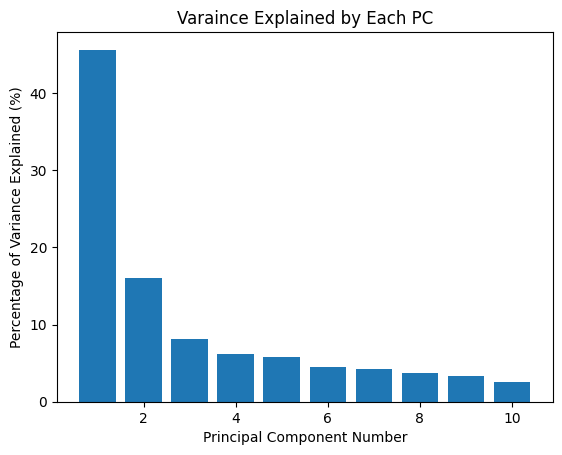

In [30]:
fig, ax = plt.subplots()
ax.bar(np.arange(1,11), pca.explained_variance_ratio_*100)

ax.set_ylabel('Percentage of Variance Explained (%)')
ax.set_xlabel('Principal Component Number')
ax.set_title('Varaince Explained by Each PC')

plt.show()

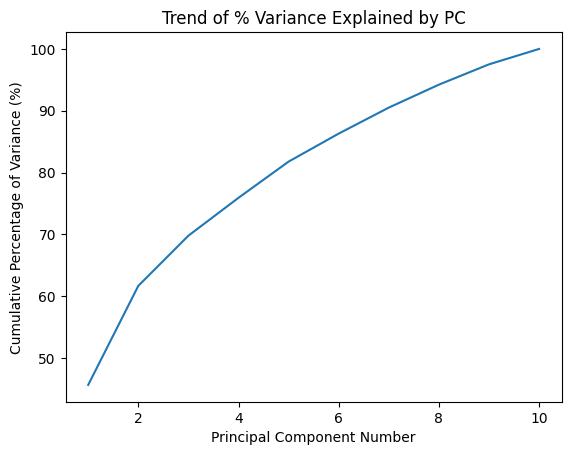

In [31]:
cum_sum_pca_ratio = pca.explained_variance_ratio_.cumsum()
plt.plot(np.arange(1,11), cum_sum_pca_ratio*100)

plt.ylabel('Cumulative Percentage of Variance (%)')
plt.xlabel('Principal Component Number')
plt.title('Trend of % Variance Explained by PC')
plt.show()

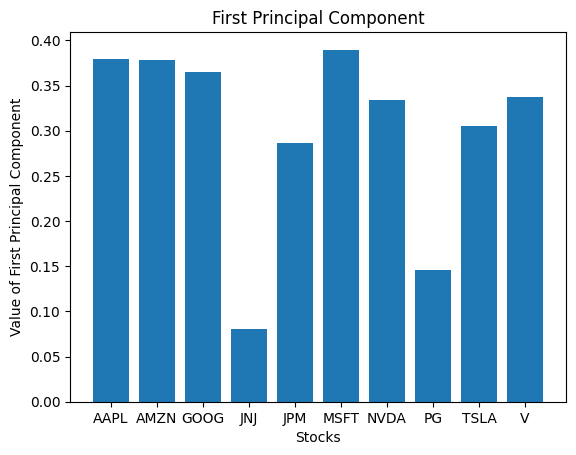

In [32]:
# Let's look at the first Principal Component
fig, ax = plt.subplots()
ax.bar(stocks, pca.components_[0])

ax.set_ylabel('Value of First Principal Component')
ax.set_xlabel('Stocks')
ax.set_title('First Principal Component')

plt.show()

This component tells you the specific linear combination of your 10 stock returns that constitutes the first principal component. A stock with a high positive loading contributes positively to PC1 when its return is high. A stock with a large negative loading (if any) would contribute positively to PC1 when its return is low.

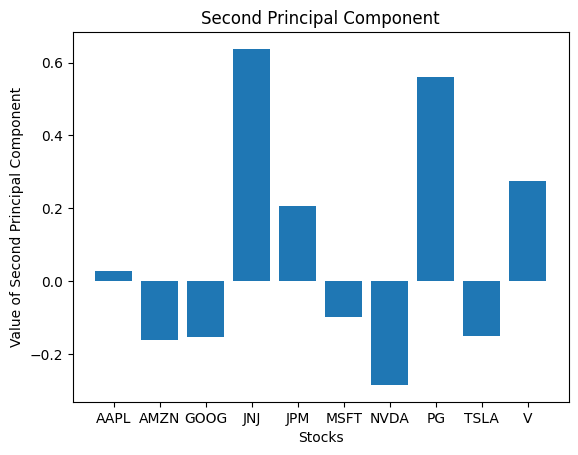

In [33]:
# And the Second PC
fig, ax = plt.subplots()
ax.bar(stocks, pca.components_[1])

ax.set_ylabel('Value of Second Principal Component')
ax.set_xlabel('Stocks')
ax.set_title('Second Principal Component')

plt.show()

This component describes a different pattern of co-movement, orthogonal to PC1. For example, if Stock A has a high positive loading on PC2 and Stock B has a high negative loading on PC2, it suggests that when PC2 is "active," Stock A tends to go up while Stock B tends to go down (or vice-versa).

Let us now project our original multi-stock returns onto the new dimensions defined by the principal components

In [34]:
factor_returns = scaled_returns_df @ pca.components_.T
factor_returns.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
factor_returns.head() # its columns will be the scores for PC1, PC2, ..., PC10 for each day

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
date,,,,,,,,,,
2022-05-11,-3.653936,0.389369,1.038487,-1.681622,-0.604128,-1.078788,1.045582,-1.984355,0.851781,0.338932
2022-05-12,-1.703708,0.360109,0.232824,-0.575855,1.129178,-0.148458,-1.302421,-0.606536,-0.192309,-0.708240
2022-05-13,4.807425,-0.789734,-0.331125,0.497307,-0.858625,0.369165,0.271059,-0.926445,-0.288919,-0.942216
2022-05-16,-1.739527,1.320458,-1.009306,-0.429754,-0.397688,0.199947,-0.156755,0.332276,-0.106299,0.403806
2022-05-17,4.133603,0.098825,1.481643,-0.515177,-0.123248,0.113361,0.452194,-0.416097,-0.554237,-0.139651


In [35]:
factor_exposures = pd.DataFrame(pca.components_, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
factor_exposures.columns = stocks
factor_exposures.head(10)

,AAPL,AMZN,GOOG,JNJ,JPM,MSFT,NVDA,PG,TSLA,V
PC1,0.378987,0.378158,0.364661,0.080733,0.286248,0.389641,0.334191,0.146016,0.305045,0.337720
PC2,0.028882,-0.162017,-0.152327,0.637387,0.206010,-0.097372,-0.284563,0.559494,-0.149916,0.273943
PC3,-0.127946,-0.148878,-0.265938,-0.035834,0.652803,-0.329972,0.010941,-0.390547,0.365174,0.261584
PC4,0.220273,-0.213681,-0.227170,-0.206186,-0.338180,-0.149608,-0.036532,0.391293,0.720467,-0.037884
PC5,0.121909,0.158470,0.227297,0.592222,-0.220346,-0.061604,-0.332478,-0.460833,0.355654,-0.236408
PC6,-0.019822,-0.216619,-0.362593,0.428443,-0.169227,0.105395,0.753970,-0.131388,-0.003658,-0.110245
PC7,0.529180,-0.303440,-0.001745,-0.067437,-0.318905,-0.112073,-0.063884,-0.324235,-0.241002,0.584628
PC8,0.625825,-0.302105,-0.067358,-0.054193,0.391710,0.137059,-0.086131,-0.004093,-0.136839,-0.557870
PC9,-0.163840,-0.551365,0.729741,0.038017,0.052644,-0.260014,0.223729,0.094113,0.055709,-0.052832
PC10,-0.277231,-0.451154,-0.035902,-0.014254,0.002413,0.770440,-0.255577,-0.127968,0.160109,0.131136


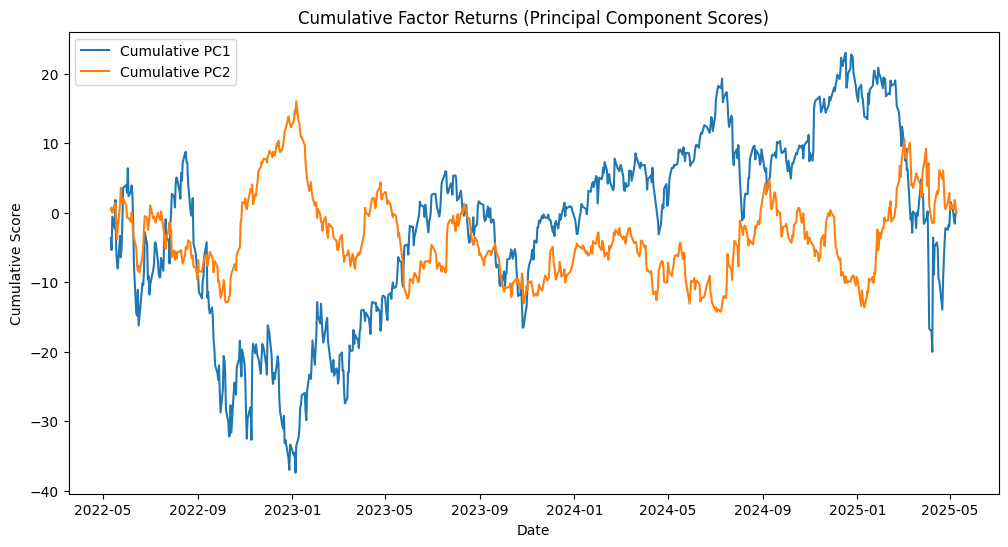

In [36]:
# Let us plot the cumulative factor returns as a time series
plt.figure(figsize=(12, 6))
(factor_returns['PC1'].cumsum()).plot(label='Cumulative PC1')
(factor_returns['PC2'].cumsum()).plot(label='Cumulative PC2')
plt.title('Cumulative Factor Returns (Principal Component Scores)')
plt.xlabel('Date')
plt.ylabel('Cumulative Score')
plt.legend()
plt.show()

In [37]:
# Correlation matrix
correlation_df = pd.concat([scaled_returns_df, factor_returns[['PC1', 'PC2']]], axis=1).corr()
correlation_df.head(12)
# print(correlation_df.loc[stocks, ['PC1', 'PC2']])

,AAPL_daily_return,AMZN_daily_return,GOOG_daily_return,JNJ_daily_return,JPM_daily_return,MSFT_daily_return,NVDA_daily_return,PG_daily_return,TSLA_daily_return,V_daily_return,PC1,PC2
AAPL_daily_return,1.000000,0.569694,0.587361,0.154812,0.394089,0.645885,0.499768,0.270822,0.506041,0.543036,8.096968e-01,3.656317e-02
AMZN_daily_return,0.569694,1.000000,0.667178,0.027491,0.389158,0.700613,0.555374,0.112026,0.478347,0.456829,8.079264e-01,-2.051030e-01
GOOG_daily_return,0.587361,0.667178,1.000000,0.034298,0.333897,0.666273,0.518458,0.120569,0.428679,0.430414,7.790906e-01,-1.928369e-01
JNJ_daily_return,0.154812,0.027491,0.034298,1.000000,0.232224,0.066160,-0.124890,0.412819,-0.010058,0.291591,1.724845e-01,8.068918e-01
JPM_daily_return,0.394089,0.389158,0.333897,0.232224,1.000000,0.363954,0.340912,0.201474,0.361067,0.556722,6.115627e-01,2.607954e-01
MSFT_daily_return,0.645885,0.700613,0.666273,0.066160,0.363954,1.000000,0.617612,0.233882,0.419468,0.468355,8.324598e-01,-1.232672e-01
NVDA_daily_return,0.499768,0.555374,0.518458,-0.124890,0.340912,0.617612,1.000000,0.024099,0.455055,0.391656,7.139919e-01,-3.602386e-01
PG_daily_return,0.270822,0.112026,0.120569,0.412819,0.201474,0.233882,0.024099,1.000000,0.059886,0.364389,3.119607e-01,7.082848e-01
TSLA_daily_return,0.506041,0.478347,0.428679,-0.010058,0.361067,0.419468,0.455055,0.059886,1.000000,0.389510,6.517226e-01,-1.897839e-01
V_daily_return,0.543036,0.456829,0.430414,0.291591,0.556722,0.468355,0.391656,0.364389,0.389510,1.000000,7.215319e-01,3.467946e-01


In [38]:
# We can also approximately reconstruct the original data
k = 2 # The larger the k, the better the reconstruction
scores_k = factor_returns.iloc[:, :k]
loadings_k = pca.components_[:k, :]
reconstructed_scaled_returns_array = scores_k.values @ loadings_k
reconstructed_scaled_returns_df = pd.DataFrame(reconstructed_scaled_returns_array, index = scaled_returns_df.index, columns = scaled_returns_df.columns)
reconstructed_scaled_returns_df.head(10)

,AAPL_daily_return,AMZN_daily_return,GOOG_daily_return,JNJ_daily_return,JPM_daily_return,MSFT_daily_return,NVDA_daily_return,PG_daily_return,TSLA_daily_return,V_daily_return
date,,,,,,,,,,
2022-05-11,-1.373547,-1.444850,-1.391760,-0.046815,-0.965718,-1.461638,-1.331913,-0.315685,-1.172988,-1.127343
2022-05-12,-0.635282,-0.702615,-0.676131,0.091983,-0.413497,-0.698899,-0.671838,-0.047290,-0.573694,-0.476727
2022-05-13,1.799140,1.945916,1.873379,-0.115248,1.213423,1.950068,1.831327,0.260110,1.584876,1.407222
2022-05-16,-0.621120,-0.871752,-0.835480,0.701205,-0.225909,-0.806367,-0.957088,0.484790,-0.728592,-0.225743
2022-05-17,1.569435,1.547144,1.492311,0.396708,1.203595,1.600999,1.353291,0.658865,1.246121,1.423074
2022-05-18,-2.798202,-2.211897,-2.144830,-2.515188,-2.673476,-2.490555,-1.524889,-2.745261,-1.725807,-3.248122
2022-05-19,-0.755823,-0.347590,-0.343508,-1.505868,-0.963304,-0.506353,-0.005957,-1.459512,-0.239432,-1.202332
2022-05-20,-0.276772,-0.599294,-0.571289,1.009860,0.102838,-0.499705,-0.769009,0.821871,-0.515976,0.173632
2022-05-23,1.866574,1.242719,1.211053,2.447671,2.008027,1.506377,0.639066,2.500074,0.940022,2.469421


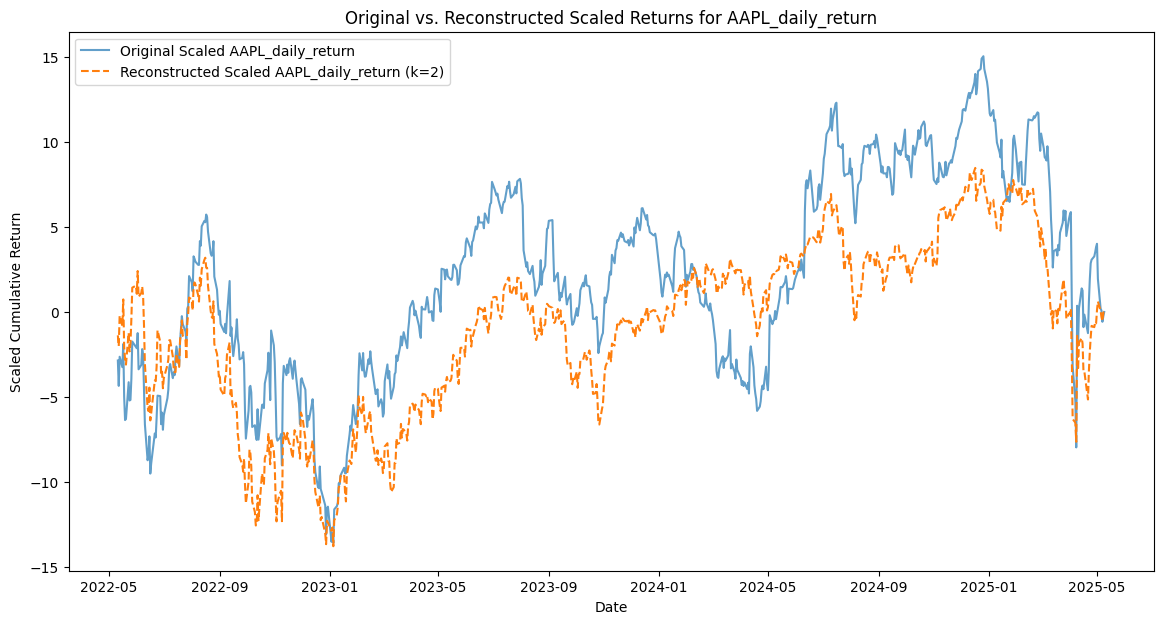

In [39]:
stock_to_plot = 'AAPL_daily_return'
plt.figure(figsize=(14, 7))
plt.plot(scaled_returns_df.index, scaled_returns_df[stock_to_plot].cumsum(), label=f'Original Scaled {stock_to_plot}', alpha=0.7)
plt.plot(reconstructed_scaled_returns_df.index, reconstructed_scaled_returns_df[stock_to_plot].cumsum(), label=f'Reconstructed Scaled {stock_to_plot} (k={k})', linestyle='--')
plt.title(f'Original vs. Reconstructed Scaled Returns for {stock_to_plot}')
plt.xlabel('Date')
plt.ylabel('Scaled Cumulative Return')
plt.legend()
plt.show()

One observation that we see is that the cumulative sum finishes quite near zero; let us test this:

In [40]:
for s in ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']:
  print(f"Final cumulative {s} score: {factor_returns[s].cumsum().iloc[-1]}")

Final cumulative PC1 score: 9.992007221626409e-15
Final cumulative PC2 score: -1.3433698597964394e-14
Final cumulative PC3 score: -1.2101430968414206e-14
Final cumulative PC4 score: -2.2093438190040615e-14
Final cumulative PC5 score: -2.1371793224034263e-15
Final cumulative PC6 score: 1.1157741397482823e-14
Final cumulative PC7 score: -9.936496070395151e-15
Final cumulative PC8 score: -6.189493362285248e-15
Final cumulative PC9 score: -1.4432899320127035e-15
Final cumulative PC10 score: 3.83026943495679e-15


The relates back to our use of `StandardScalar` which has zero mean and variance 1:

In [41]:
print("Mean of PC1 scores:", factor_returns['PC1'].mean())
print("Mean of PC2 scores:", factor_returns['PC2'].mean())

print("\nSum of PC1 scores:", factor_returns['PC1'].sum())
print("Sum of PC2 scores:", factor_returns['PC2'].sum())

Mean of PC1 scores: 3.6613738046148777e-17
Mean of PC2 scores: -1.1810883240693155e-17

Sum of PC1 scores: 2.7533531010703882e-14
Sum of PC2 scores: -8.881784197001252e-15


# Factor Mimicking Portfolios

Let's try to construct a portfolio that aims to mimic the returns of your PC1.

A straightforward way to create a factor-mimicking portfolio is to use these loadings as the basis for portfolio weights.

*   If a stock has a higher loading on PC1, it should get a larger weight in our PC1-mimicking portfolio.
*   Since all your PC1 loadings are positive, this will be a long-only portfolio.


In [42]:
# Store the component 1 loadings
PC1_loadings = factor_exposures.loc['PC1']
weights_pc1 = PC1_loadings/sum(PC1_loadings) # Normalize weights
equal_weights = pd.Series([0.1]*10, index = stocks)
print(weights_pc1)
#print(equal_weights)

# Component 2
PC2_loadings = factor_exposures.loc['PC2']
weights_pc2 = PC2_loadings/sum(PC2_loadings) # Normalize weights

AAPL    0.126270
AMZN    0.125994
GOOG    0.121497
JNJ     0.026898
JPM     0.095371
MSFT    0.129820
NVDA    0.111345
PG      0.048649
TSLA    0.101634
V       0.112521
Name: PC1, dtype: float64


In [43]:
returns_df = final_returns_df
returns_df.columns = stocks # Just to make sure the col_indexes of the df and series are the same

In [44]:
portfolio_returns_mimic_pc1 = returns_df @ weights_pc1
portfolio_returns_mimic_pc2 = returns_df @ weights_pc2
portfolio_returns_equal_weight = returns_df @ equal_weights
print(portfolio_returns_mimic_pc1)

date
2022-05-11   -0.029686
2022-05-12   -0.010404
2022-05-13    0.038395
2022-05-16   -0.015074
2022-05-17    0.030872
                ...   
2025-05-05   -0.009409
2025-05-06   -0.006192
2025-05-07   -0.002998
2025-05-08    0.011838
2025-05-09    0.004225
Length: 752, dtype: float64


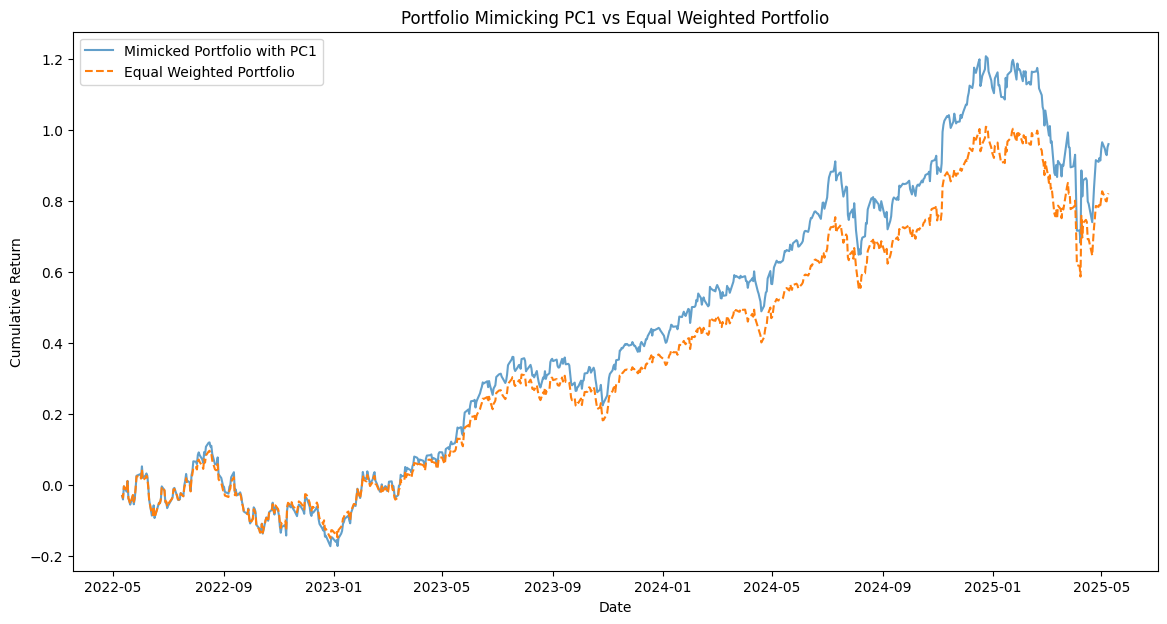

In [45]:
# Remember compounding
cumulative_portfolio_returns_mimic_pc1 = (1 + portfolio_returns_mimic_pc1).cumprod() - 1
cumulative_portfolio_returns_equal_weight = (1 + portfolio_returns_equal_weight).cumprod() - 1

plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_returns_mimic_pc1.index, cumulative_portfolio_returns_mimic_pc1, label=f'Mimicked Portfolio with PC1', alpha=0.7)
plt.plot(cumulative_portfolio_returns_equal_weight.index, cumulative_portfolio_returns_equal_weight, label=f'Equal Weighted Portfolio', linestyle='--')
plt.title(f'Portfolio Mimicking PC1 vs Equal Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

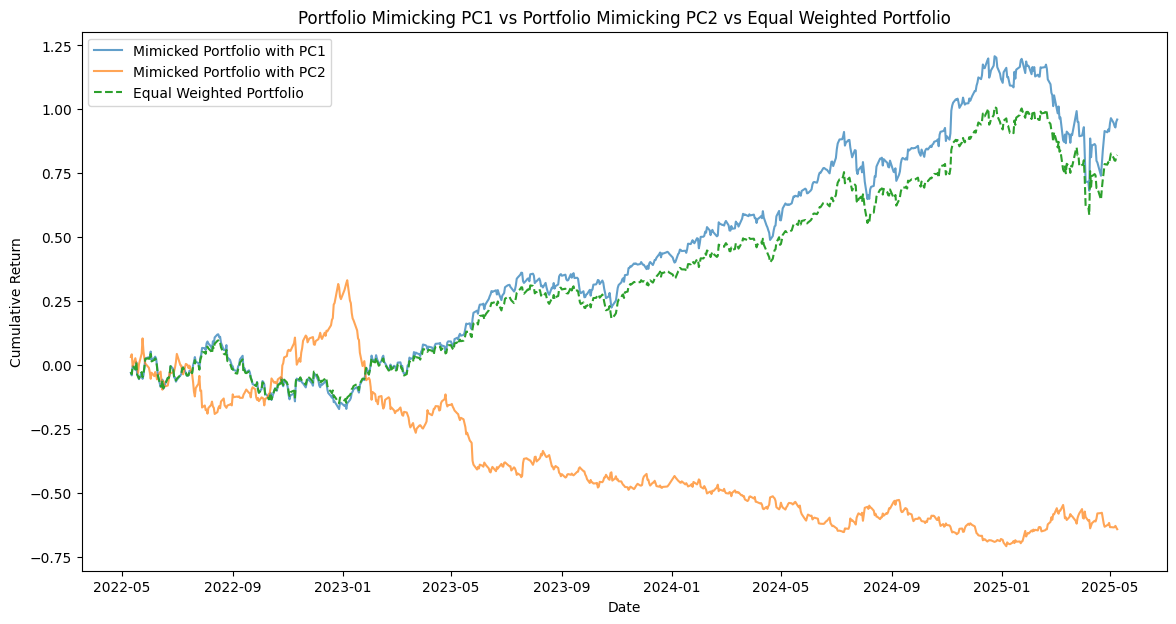

In [46]:
cumulative_portfolio_returns_mimic_pc2 = (1 + portfolio_returns_mimic_pc2).cumprod() - 1

plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_returns_mimic_pc1.index, cumulative_portfolio_returns_mimic_pc1, label=f'Mimicked Portfolio with PC1', alpha=0.7)
plt.plot(cumulative_portfolio_returns_mimic_pc2.index, cumulative_portfolio_returns_mimic_pc2, label=f'Mimicked Portfolio with PC2', alpha=0.7)
plt.plot(cumulative_portfolio_returns_equal_weight.index, cumulative_portfolio_returns_equal_weight, label=f'Equal Weighted Portfolio', linestyle='--')
plt.title(f'Portfolio Mimicking PC1 vs Portfolio Mimicking PC2 vs Equal Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()